# Table of Contents

* [Initial Analytics and Visualisation](#chapter1)
    * [Load Dataframe](#section_1_1)
* [Machine Learning Models - Imbalanced Data](#chapter2)
    * [Model Data Preprocessing](#section_2_1)
    * [Logistic Regression](#section_2_2)
        * [LR Hold-out Validation](#section_2_2_1)
        * [LR Confusion Matrix](#section_2_2_2)
        * [LR Classification Report](#section_2_2_3)
        * [LR Accuracy Score](#section_2_2_4)
        * [LR Important Features](#section_2_2_5)
        * [LR Cross Validation](#section_2_2_6) 
    * [Gradient Boosting](#section_2_3)
        * [GB Hold-out Validation](#section_2_3_1)
        * [GB Confusion Matrix](#section_2_3_2)
        * [GB Classification Report](#section_2_3_3)
        * [GB Accuracy Score](#section_2_3_4)
        * [GB Important Features](#section_2_3_5)
        * [GB Cross Validation](#section_2_3_6)
    * [Decision Tree](#section_2_4)
        * [DT Hold-out Validation](#section_2_4_1)
        * [DT Confusion Matrix](#section_2_4_2)
        * [DT Classification Report](#section_2_4_3)
        * [DT Accuracy Score](#section_2_4_4)
        * [DT Important Features](#section_2_4_5)
        * [DT ROC Curve](#section_2_4_6)
* [Machine Learning Models - Balanced Data](#chapter3)
    * [Logistic Regression](#section_3_1)
        * [LR Hold-out Validation](#section_3_1_1)
        * [LR Confusion Matrix](#section_3_1_2)
        * [LR Classification Report](#section_3_1_3)
        * [LR Accuracy Score](#section_3_1_4)
        * [LR Important Features](#section_3_1_5)
        * [LR Cross Validation](#section_3_1_6)
    * [Gradient Boosting](#section_3_2)
        * [GB Hold-out Validation](#section_3_2_1)
        * [GB Confusion Matrix](#section_3_2_2)
        * [GB Classification Report](#section_3_2_3)
        * [GB Accuracy Score](#section_3_2_4)
        * [GB Important Features](#section_3_2_5)
        * [GB Cross Validation](#section_3_2_6)
    * [Decision Tree](#section_3_3)
        * [DT Hold-out Validation](#section_3_3_1)
        * [DT Confusion Matrix](#section_3_3_2)
        * [DT Classification Report](#section_3_3_3)
        * [DT Accuracy Score](#section_3_3_4)
        * [DT Important Features](#section_3_3_5)
        * [DT ROC Curve](#section_3_3_6)
* [Results Comparison of Balanced and Imbalanced Dataset](#chapter4)
    * [Logistic Regression](#section_4_1)
    * [Gradient Boosting](#section_4_2)
    * [Decision Tree](#section_4_3)

# Initial Analytics and Visualisation <a class="anchor" id="chapter1"></a>

## Load Dataframe <a class="anchor" id="section_1_1"></a>

In [1]:
import os
import numpy as np
from time import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import quantecon as qe
from dython.nominal import associations
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn import metrics

In [2]:
# Load dataframe from csv file
df = pd.read_csv("final_cleaned_crypto_bernardamus_network_nodes.csv")
train = pd.read_csv("nodes_train.csv")
train_bal = pd.read_csv("nodes_train_balanced.csv")
test = pd.read_csv("nodes_test.csv")
test_bal = pd.read_csv("nodes_test_balanced.csv")
val = pd.read_csv("nodes_validate.csv")
val_bal = pd.read_csv("nodes_validate_balanced.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Screen Name               2954 non-null   object 
 1   Age in Years              2954 non-null   int64  
 2   # of Followers            2954 non-null   int64  
 3   # of Followings           2954 non-null   int64  
 4   Follower/Following Ratio  2954 non-null   float64
 5   URL                       2954 non-null   int64  
 6   Verified                  2954 non-null   int64  
 7   Number of Tweets          2954 non-null   int64  
 8   # of liked Tweets         2954 non-null   int64  
 9   # of lists                2954 non-null   int64  
 10  Bot: 4.0 Threshold        2954 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 254.0+ KB


In [4]:
# Rename column to "Label" for easy use
train.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)
train_bal.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)
test.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)
test_bal.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)
val.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)
val_bal.rename(columns = {'Bot: 4.0 Threshold': 'Label'}, inplace = True)

# Machine Learning Models - Imbalanced Data <a class="anchor" id="chapter2"></a>

## Model Data Preprocessing <a class="anchor" id="section_2_1"></a>

In [5]:
# Columns used for all models
columns = ['Age in Years','# of Followers','# of Followings','Follower/Following Ratio',
           'URL','Verified','Number of Tweets','# of liked Tweets','# of lists',
           'Label']

In [6]:
feature_use = list(train.columns[1:-1])

In [7]:
feature_use

['Age in Years',
 '# of Followers',
 '# of Followings',
 'Follower/Following Ratio',
 'URL',
 'Verified',
 'Number of Tweets',
 '# of liked Tweets',
 '# of lists']

## Logistic Regression <a class="anchor" id="section_2_2"></a>

### LR Hold-out Validation <a class="anchor" id="section_2_2_1"></a>

In [8]:
# Tuning parameter for LogisticRegression
lr1 = LogisticRegression(solver = 'saga', max_iter = 500, C= 0.001)
# fitting train set
lr1.fit(train[feature_use], train['Label'])
# predict for test set
y_predict_lr1 = lr1.predict(test[feature_use])

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### LR Confusion Matrix <a class="anchor" id="section_2_2_2"></a>

In [9]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Blues'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(b=None)
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[850   0]
 [135   0]]


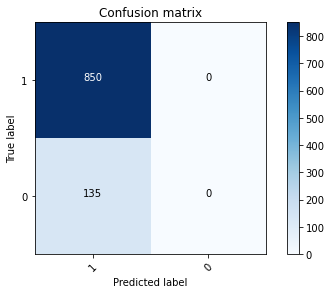

In [10]:
# Plot confusion matrix 
cfm_lr1 = confusion_matrix(test['Label'], y_predict_lr1)
plot_confusion_matrix(cfm_lr1, classes=[1,0], normalize=False)

### LR Classification Report <a class="anchor" id="section_2_2_3"></a>

In [11]:
# Classification report for label and prediction
print(classification_report(test['Label'], y_predict_lr1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       850
           1       0.00      0.00      0.00       135

    accuracy                           0.86       985
   macro avg       0.43      0.50      0.46       985
weighted avg       0.74      0.86      0.80       985



C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LR Accuracy Score <a class="anchor" id="section_2_2_4"></a>

In [12]:
y_true_lr1 = list(test['Label'])
accuracy_lr1 = accuracy_score(y_true_lr1, y_predict_lr1, normalize=True)
print(accuracy_lr1)

0.8629441624365483


### LR Important Features <a class="anchor" id="section_2_2_5"></a>

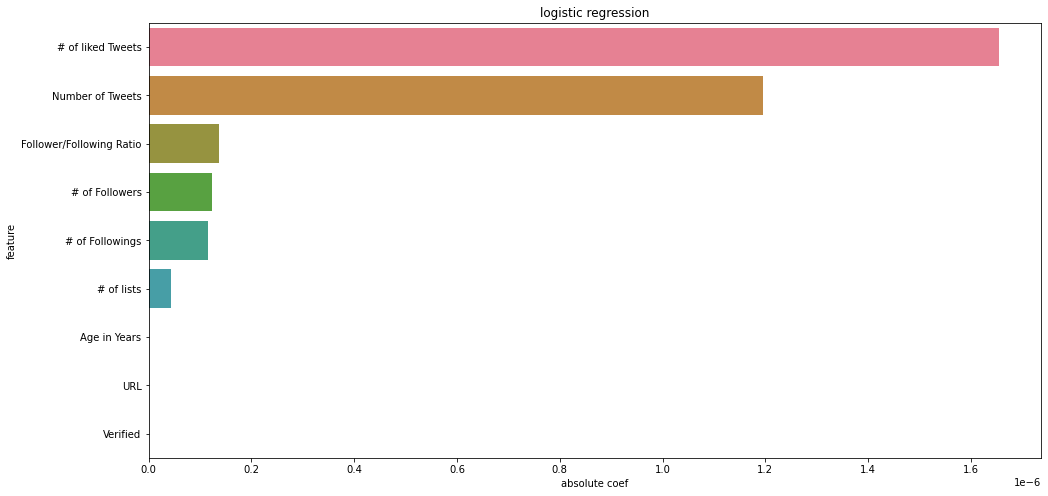

In [13]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = np.abs(lr1.coef_).reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)


plt.figure(figsize=[16,8])
##
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.xlabel('absolute coef')
plt.title('logistic regression');

### LR Cross-Validation <a class="anchor" id="section_2_2_6"></a>

In [14]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=30, min_impurity_split=0.25)
score1_lr1 = cross_val_score(clf1, val[feature_use], val['Label'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [15]:
print('Cross_validation score:', score1_lr1)

Cross_validation score: [0.44067797 0.24561404 0.40677966 0.40625   ]


In [16]:
#Label2 is a column with Human tagged as 1 and Bot tagged as 0
val['Label2'] = val['Label'].replace({1:0, 0:1}).astype(int)
clf2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25)
score2_lr1 = cross_val_score(clf2, val[feature_use], val['Label2'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [18]:
print('Cross_validation score:', score2_lr1)

Cross_validation score: [0.92523364 0.89559165 0.91916859 0.91079812]


## Gradient Boosting <a class="anchor" id="section_2_3"></a>

### GB Hold-out Validation <a class="anchor" id="section_2_3_1"></a>

In [19]:
# Tuning parameters for Gradient Boosting Classifier
gb1 = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 10, subsample = 0.8,
                               max_depth=25)
# Fit base model on training data set
gb1.fit(train[feature_use], train['Label'])
# Evaluate the model
y_predict_gb1 = gb1.predict(test[feature_use])

### GB Confusion Matrix <a class="anchor" id="section_2_3_2"></a>

Confusion matrix, without normalization
[[807  43]
 [ 72  63]]


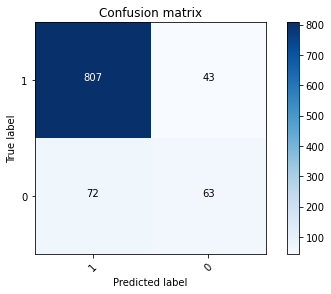

In [20]:
# Plot confusion matrix without normalization
cfm_gb1 = confusion_matrix(test['Label'], y_predict_gb1)
plot_confusion_matrix(cfm_gb1, classes=[1,0], normalize=False)

### GB Classification Report <a class="anchor" id="section_2_3_3"></a>

In [21]:
# Classification report for label and prediction
print(classification_report(test['Label'], y_predict_gb1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       850
           1       0.59      0.47      0.52       135

    accuracy                           0.88       985
   macro avg       0.76      0.71      0.73       985
weighted avg       0.87      0.88      0.88       985



### GB Accuracy Score <a class="anchor" id="section_2_3_4"></a>

In [22]:
y_true_gb1 = list(test['Label'])
accuracy_gb1 = accuracy_score(y_true_gb1, y_predict_gb1, normalize=True)
print(accuracy_gb1)

0.883248730964467


### GB Important Features <a class="anchor" id="section_2_3_5"></a>

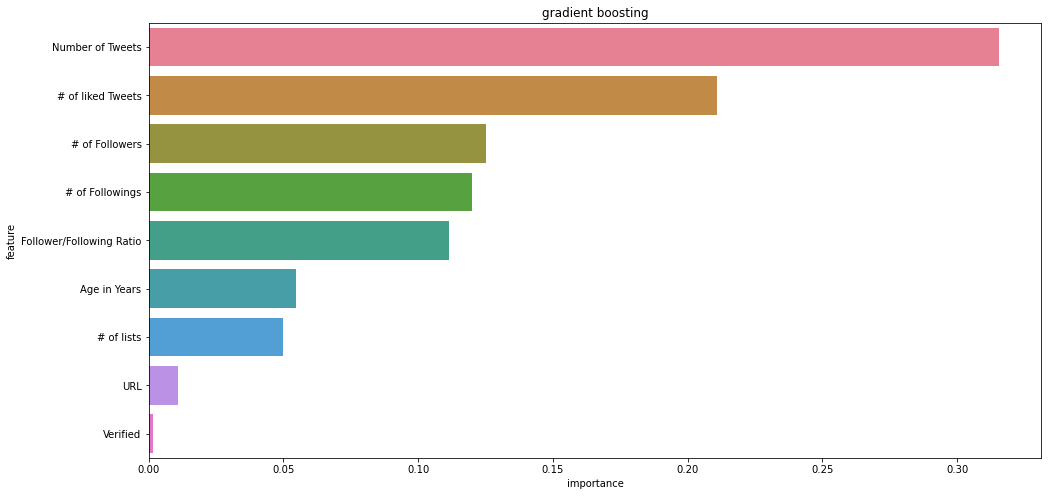

In [23]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = gb1.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('gradient boosting');

### GB Cross Validation <a class="anchor" id="section_2_3_6"></a>

In [24]:
score1_gb1 = cross_val_score(gb1, val[feature_use], val['Label'], cv=3, scoring='f1')

In [25]:
print(score1_gb1)

[0.37209302 0.43956044 0.49438202]


In [26]:
score2_gb1 = cross_val_score(gb1, val[feature_use], val['Label2'], cv=3, scoring='f1')

In [27]:
print(score2_gb1)

[0.90391459 0.90035587 0.91388401]


## Decision Tree <a class="anchor" id="section_2_4"></a>

### DT Hold-out Validation <a class="anchor" id="section_2_4_1"></a>

In [28]:
# Tuning parameter
tree1 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25)
# Fit base model on training data set
tree1.fit(train[feature_use], train['Label'])
# Evaluate the model
y_predict_tree1 = tree1.predict(test[feature_use])

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


### DT Confusion Matrix <a class="anchor" id="section_2_4_2"></a>

Confusion matrix, without normalization
[[801  49]
 [ 70  65]]


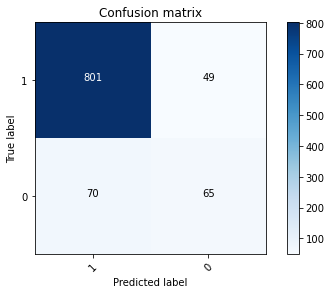

In [29]:
# Plot confusion matrix without normalization
cfm_tree1 = confusion_matrix(test['Label'], y_predict_tree1)
plot_confusion_matrix(cfm_tree1, classes=[1,0], normalize=False)

### DT Classification Report <a class="anchor" id="section_2_4_3"></a>

In [30]:
# Classification report for label and prediction
print(classification_report(test['Label'], y_predict_tree1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       850
           1       0.57      0.48      0.52       135

    accuracy                           0.88       985
   macro avg       0.74      0.71      0.73       985
weighted avg       0.87      0.88      0.87       985



### DT Accuracy Score <a class="anchor" id="section_2_4_4"></a>

In [31]:
y_true_tree1 = list(test['Label'])
accuracy_tree1 = accuracy_score(y_true_tree1, y_predict_tree1, normalize=True)
print(accuracy_tree1)

0.8791878172588833


### DT Important Features <a class="anchor" id="section_2_4_5"></a>

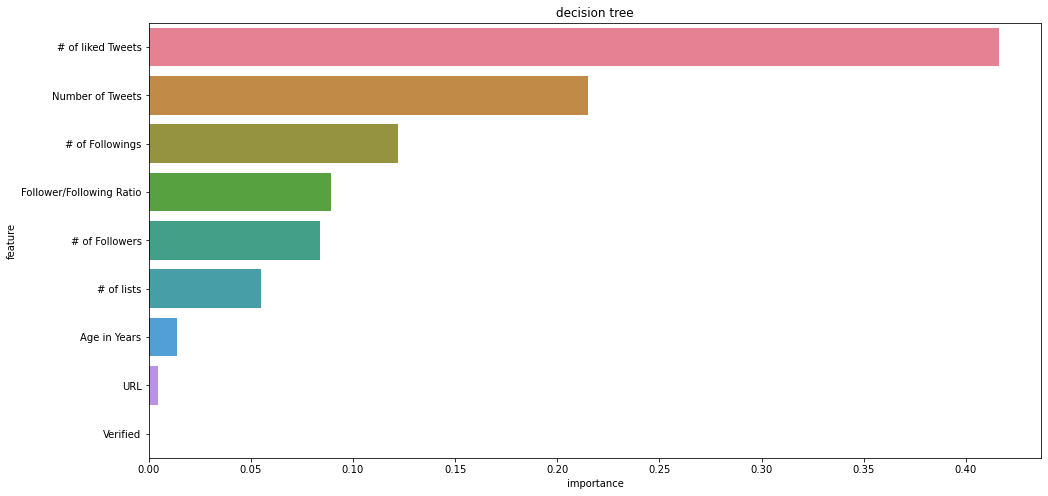

In [32]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = tree1.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('decision tree');

### DT ROC Curve <a class="anchor" id="section_2_4_6"></a>

In [33]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):
    """Prints the AUC scores for training and testing data and returns testing score"""
    
    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)

    print(f"""
        Training AUC: {auc_train}
        Testing AUC: {auc_test}""")
 
    return y_test_score

In [34]:
def plot_roc_curve(y_test, y_test_score):
    """Plot ROC curve for testing data"""

    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "k-")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


        Training AUC: 0.9122275476435011
        Testing AUC: 0.7989803921568628


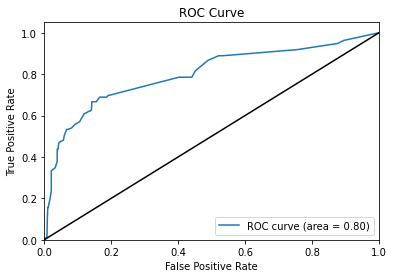

In [35]:
plot_roc_curve(test['Label'], get_auc_scores(tree1, train[feature_use], test[feature_use], train['Label'], test['Label']))

# Machine Learning Models - Balanced Dataset <a class="anchor" id="chapter3"></a>

## Logistic Regression <a class="anchor" id="section_3_1"></a>

### LR Hold-out Validation <a class="anchor" id="section_3_1_1"></a>

In [36]:
# Tuning parameter for LogisticRegression
lr2 = LogisticRegression(solver = 'saga', max_iter = 500, C= 0.001)
# fitting train set
lr2.fit(train_bal[feature_use], train_bal['Label'])
# predict for test set
y_predict_lr2 = lr2.predict(test_bal[feature_use])

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### LR Confusion Matrix <a class="anchor" id="section_3_1_2"></a>

Confusion matrix, without normalization
[[ 24 122]
 [  7 126]]


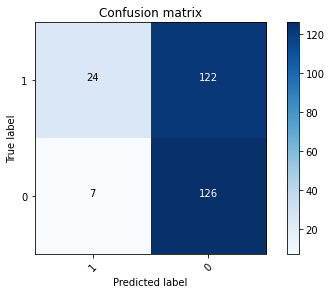

In [37]:
# Plot confusion matrix 
cfm_lr2 = confusion_matrix(test_bal['Label'], y_predict_lr2)
plot_confusion_matrix(cfm_lr2, classes=[1,0], normalize=False)

### LR Classification Report <a class="anchor" id="section_3_1_3"></a>

In [38]:
# Classification report for label and prediction
print(classification_report(test_bal['Label'], y_predict_lr2))

              precision    recall  f1-score   support

           0       0.77      0.16      0.27       146
           1       0.51      0.95      0.66       133

    accuracy                           0.54       279
   macro avg       0.64      0.56      0.47       279
weighted avg       0.65      0.54      0.46       279



### LR Accuracy Score <a class="anchor" id="section_3_1_4"></a>

In [39]:
y_true_lr2 = list(test_bal['Label'])
accuracy_lr2 = accuracy_score(y_true_lr2, y_predict_lr2, normalize=True)
print(accuracy_lr2)

0.5376344086021505


### LR Important Features <a class="anchor" id="section_3_1_5"></a>

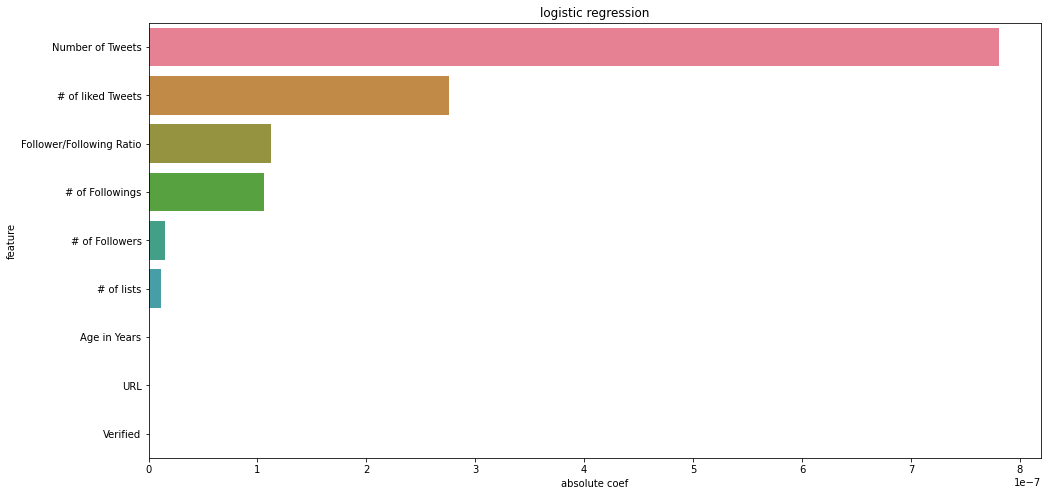

In [40]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = np.abs(lr2.coef_).reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)


plt.figure(figsize=[16,8])
##
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.xlabel('absolute coef')
plt.title('logistic regression');

### LR Cross-Validation <a class="anchor" id="section_3_1_6"></a>

In [41]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=30, min_impurity_split=0.25)
score1_lr2 = cross_val_score(clf1, val_bal[feature_use], val_bal['Label'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [42]:
print('Cross_validation score:', score1_lr2)

Cross_validation score: [0.71604938 0.73333333 0.7012987  0.73417722]


In [43]:
#Label2 is a column with Human tagged as 1 and Bot tagged as 0
val_bal['Label2'] = val_bal['Label'].replace({1:0, 0:1}).astype(int)
clf2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25)
score2_lr2 = cross_val_score(clf2, val_bal[feature_use], val_bal['Label2'], cv=4, scoring='f1')

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The

In [44]:
print('Cross_validation score:', score2_lr2)

Cross_validation score: [0.61016949 0.46808511 0.63492063 0.6440678 ]


## Gradient Boosting <a class="anchor" id="section_3_2"></a>

### GB Hold-out Validation <a class="anchor" id="section_3_2_1"></a>

In [45]:
# Tuning parameters for Gradient Boosting Classifier
gb2 = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 10, subsample = 0.8,
                               max_depth=25)
# Fit base model on training data set
gb2.fit(train_bal[feature_use], train_bal['Label'])
# Evaluate the model
y_predict_gb2 = gb1.predict(test_bal[feature_use])

### GB Confusion Matrix <a class="anchor" id="section_3_2_2"></a>

Confusion matrix, without normalization
[[143   3]
 [ 26 107]]


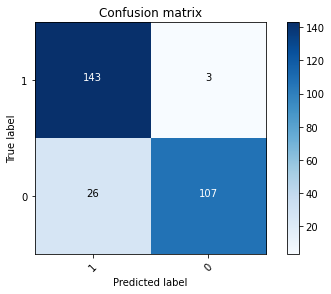

In [46]:
# Plot confusion matrix without normalization
cfm_gb2 = confusion_matrix(test_bal['Label'], y_predict_gb2)
plot_confusion_matrix(cfm_gb2, classes=[1,0], normalize=False)

### GB Classification Report <a class="anchor" id="section_3_2_3"></a>

In [47]:
# Classification report for label and prediction
print(classification_report(test_bal['Label'], y_predict_gb2))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       146
           1       0.97      0.80      0.88       133

    accuracy                           0.90       279
   macro avg       0.91      0.89      0.89       279
weighted avg       0.91      0.90      0.89       279



### GB Accuracy Score <a class="anchor" id="section_3_2_4"></a>

In [48]:
y_true_gb2 = list(test_bal['Label'])
accuracy_gb2 = accuracy_score(y_true_gb2, y_predict_gb2, normalize=True)
print(accuracy_gb2)

0.8960573476702509


### GB Important Features <a class="anchor" id="section_3_2_5"></a>

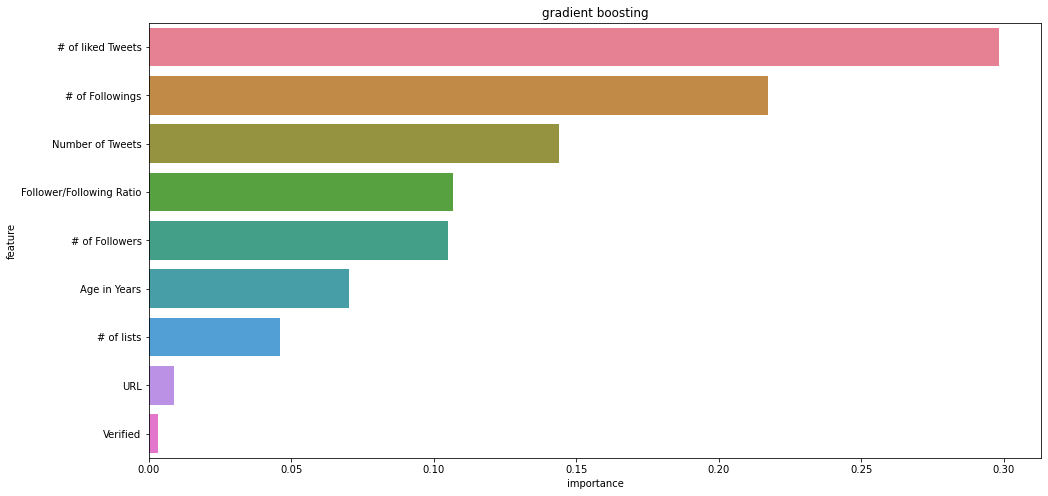

In [49]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = gb2.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('gradient boosting');

### GB Cross Validation <a class="anchor" id="section_3_2_6"></a>

In [50]:
score1_gb2 = cross_val_score(gb2, val_bal[feature_use], val_bal['Label'], cv=3, scoring='f1')

In [59]:
print(score1_gb2)

[0.73267327 0.77192982 0.75925926]


In [51]:
score2_gb2 = cross_val_score(gb2, val_bal[feature_use], val_bal['Label2'], cv=3, scoring='f1')

In [52]:
print(score2_gb2)

[0.64285714 0.67532468 0.70886076]


## Decision Tree <a class="anchor" id="section_3_3"></a>

### DT Hold-out Validation <a class="anchor" id="section_3_3_1"></a>

In [53]:
# Tuning parameter
tree2 = DecisionTreeClassifier(criterion='entropy',
                               max_depth=11, min_samples_split=30, min_impurity_split=0.25)
# Fit base model on training data set
tree2.fit(train_bal[feature_use], train_bal['Label'])
# Evaluate the model
y_predict_tree2 = tree2.predict(test_bal[feature_use])

C:\Users\VNCERT09\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


### DT Confusion Matrix <a class="anchor" id="section_3_3_2"></a>

Confusion matrix, without normalization
[[120  26]
 [ 50  83]]


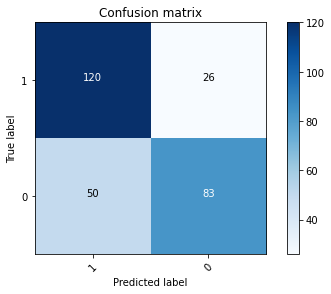

In [54]:
# Plot confusion matrix without normalization
cfm_tree2 = confusion_matrix(test_bal['Label'], y_predict_tree2)
plot_confusion_matrix(cfm_tree2, classes=[1,0], normalize=False)

### DT Classification Report <a class="anchor" id="section_3_3_3"></a>

In [55]:
# Classification report for label and prediction
print(classification_report(test_bal['Label'], y_predict_tree2))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       146
           1       0.76      0.62      0.69       133

    accuracy                           0.73       279
   macro avg       0.73      0.72      0.72       279
weighted avg       0.73      0.73      0.72       279



### DT Accuracy Score <a class="anchor" id="section_3_3_4"></a>

In [56]:
y_true_tree2 = list(test_bal['Label'])
accuracy_tree2 = accuracy_score(y_true_tree2, y_predict_tree2, normalize=True)
print(accuracy_tree2)

0.7275985663082437


### DT Important Features <a class="anchor" id="section_3_3_5"></a>

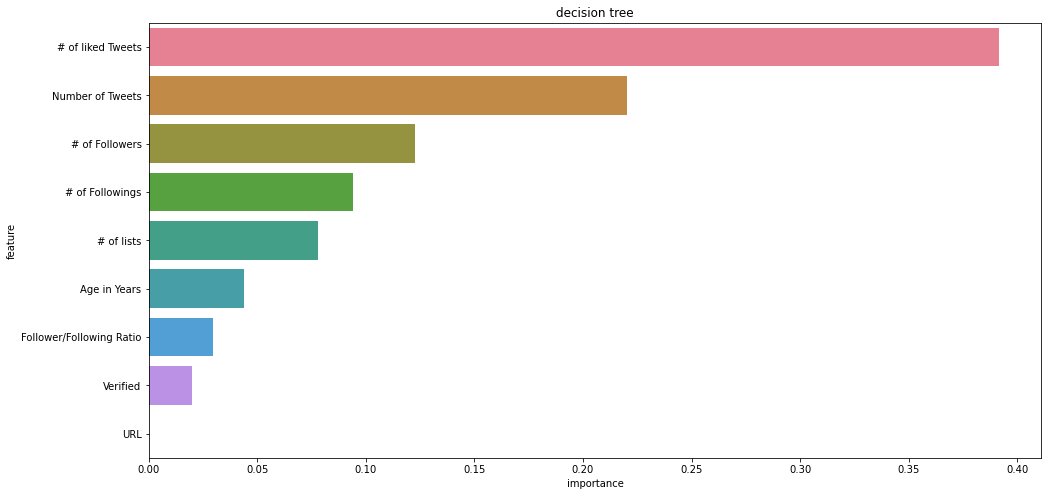

In [57]:
# Ploting to show level of important factors
f =pd.DataFrame({'feature':[None]*len(feature_use), 'coef':[None]*len(feature_use)})
f['feature'] = feature_use
f['importance'] = tree2.feature_importances_.reshape(-1,1)
f = f.sort_values(by=['importance'], ascending=False)
plt.figure(figsize=[16,8])
sns.barplot(y=f['feature'][:25], x=f['importance'][:25], palette="husl");
plt.title('decision tree');

### DT ROC Curve <a class="anchor" id="section_3_3_6"></a>


        Training AUC: 0.9151227013298164
        Testing AUC: 0.7787619734267174


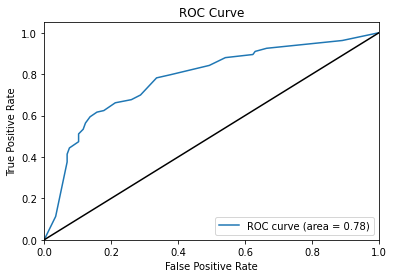

In [58]:
plot_roc_curve(test_bal['Label'], get_auc_scores(tree2, train_bal[feature_use], test_bal[feature_use], train_bal['Label'], test_bal['Label']))

# Results Comparison of Balanced and Imbalanced Dataset <a class="anchor" id="chapter4"></a>

## Logistic Regression <a class="anchor" id="section_4_1"></a>

## Gradient Boosting <a class="anchor" id="section_4_2"></a>

## Decision Tree <a class="anchor" id="section_4_3"></a>